<a href="https://colab.research.google.com/github/geun-hyoung/python_local_outlier_factor_text_info/blob/main/lof_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setting

In [1]:
# Restart!
!pip install spacy-transformers
!python -m spacy download en_core_web_trf
!pip install gensim
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install pyLDAvis
!pip install tqdm
!pip install transformers
!pip install keybert
!pip install umap-learn
!pip install ace_tools

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 756.2/756.2 kB 7.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 314.0/314.0 kB 7.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 44.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 20.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 26.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import re
import pandas as pd

import spacy
from bs4 import BeautifulSoup

Mounted at /content/drive


## 1. Data load & Cleaning

In [5]:
import json

attraction_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/inbound_service/local_outlier_factor_analysis/korea_attraction_info.csv')

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌôïÏù∏
print(attraction_df.shape)
attraction_df.head()

(1422, 9)


searched_name search_result  \
0          ÏóêÎ≤ÑÎûúÎìú          ÏóêÎ≤ÑÎûúÎìú   
1        Î¶¨ÏõÄ ÎØ∏Ïà†Í¥Ä        Î¶¨ÏõÄ ÎØ∏Ïà†Í¥Ä   
2        ÌòëÏû¨Ìï¥ÏàòÏöïÏû•        ÌòëÏû¨Ìï¥ÏàòÏöïÏû•   
3  Î†àÍ≥†ÎûúÎìú ÏΩîÎ¶¨ÏïÑ Î¶¨Ï°∞Ìä∏  Î†àÍ≥†ÎûúÎìú ÏΩîÎ¶¨ÏïÑ Î¶¨Ï°∞Ìä∏   
4      ÏùµÏÑ†Îèô ÌïúÏò•Í±∞Î¶¨      ÏùµÏÑ†Îèô ÌïúÏò•Í±∞Î¶¨   

                                     attraction_info  source  similarity  \
0  1ÎÖÑ 365Ïùº, Í≥ÑÏ†àÎ≥Ñ Îã§Ï±ÑÎ°≠Í≤å ÌéºÏ≥êÏßÄÎäî Ï∂ïÏ†úÏôÄ Ïñ¥Ìä∏ÎûôÏÖò, ÎèôÎ¨º, ÏãùÎ¨º Îì± Îã§ÏñëÌïú ...  second       100.0   
1  ÏÇºÏÑ±Î¨∏ÌôîÏû¨Îã®ÏùÄ 1965ÎÖÑ ÏÑ§Î¶Ω Ïù¥ÎûòÎ°ú ÌïúÍµ≠Î¨∏ÌôîÏòàÏà† Î∞úÏ†ÑÏùÑ ÏúÑÌï¥ Í∏∞Ïó¨Ìï¥ ÏôîÎã§. ÏÇºÏÑ±Í∑∏...  second       100.0   
2  ÌòëÏû¨Ìï¥ÏàòÏöïÏû•ÏùÄ Ï†úÏ£ºÏãú ÏÑúÏ™Ω 32km Í±∞Î¶¨Ïùò ÌïúÎ¶ºÍ≥µÏõêÏóê Ïù∏Ï†ëÌï¥ ÏûàÎã§. Ï°∞Í∞úÍªçÏßà Í∞ÄÎ£®Í∞Ä...  second       100.0   
3  Î†àÍ≥†ÎûúÎìú ÏΩîÎ¶¨ÏïÑ Î¶¨Ï°∞Ìä∏(LEGOLAND¬Æ Korea Resort)Îäî Í∞ïÏõêÎèÑ Ï∂òÏ≤úÏãú ...  second       100.0   
4  ÏùµÏÑ†ÎèôÏùÄ Í≥®Î™©Í≥º ÌïúÏò•Ïù¥ Ïñ¥Ïö∞Îü¨Ï†∏ ÏïÑÎ¶ÑÎã§Ïö¥ Îß§Î†•ÏùÑ ÌíçÍ∏∞Îäî Í≥≥ÏúºÎ°ú, ÎÇ®ÎÖÄÎÖ∏ÏÜå ÎßéÏùÄ Í¥ÄÍ¥ë...  second       100.0   

                                        english_info attraction_korean_name  \
0  This theme park offers enjoyable relaxation an...                   ÏóêÎ≤ÑÎûúÎìú   
1  The Samsung Cultural Foundation has contribute...                 Î¶¨ÏõÄ ÎØ∏Ïà†Í¥Ä   
2  Hyeopjae Beach is adjacent to Hallim Park, 32k...                 ÌòëÏû¨Ìï¥ÏàòÏöïÏû•   
3  LEGOLAND¬Æ Korea Resort, located in Jungdo, Chu...           Î†àÍ≥†ÎûúÎìú ÏΩîÎ¶¨ÏïÑ Î¶¨Ï°∞Ìä∏   
4  Ikseon-dong is a place where alleys and hanoks...               ÏùµÏÑ†Îèô ÌïúÏò•Í±∞Î¶¨   

    attraction_english_name                      name  
0                  Everland                  Everland  
1          Leeum Art Museum          Leeum Art Museum  
2            Hyeopjae Beach            Hyeopjae Beach  
3     Legoland Korea Resort     Legoland Korea Resort  
4  Ikseon-dong Hanok Street  Ikseon-dong Hanok Street

In [6]:
# ‚úÖ Ï†úÍ±∞Ìï† Ïó¥ Î™©Î°ù
columns_to_drop = ['searched_name', 'source', 'similarity', 'attraction_korean_name', 'attraction_english_name']

# ‚úÖ Ïó¥ Ï†úÍ±∞ (Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäî Ïó¥ÏùÄ Î¨¥Ïãú)
attraction_df = attraction_df.drop(columns=columns_to_drop, errors='ignore')

# ‚úÖ Í≤∞Í≥º ÌôïÏù∏
print("‚úÖ ÏßÄÏ†ïÎêú Ïó¥ Ï†úÍ±∞ ÏôÑÎ£å.")
display(attraction_df.head())

‚úÖ ÏßÄÏ†ïÎêú Ïó¥ Ï†úÍ±∞ ÏôÑÎ£å.


search_result                                    attraction_info  \
0          ÏóêÎ≤ÑÎûúÎìú  1ÎÖÑ 365Ïùº, Í≥ÑÏ†àÎ≥Ñ Îã§Ï±ÑÎ°≠Í≤å ÌéºÏ≥êÏßÄÎäî Ï∂ïÏ†úÏôÄ Ïñ¥Ìä∏ÎûôÏÖò, ÎèôÎ¨º, ÏãùÎ¨º Îì± Îã§ÏñëÌïú ...   
1        Î¶¨ÏõÄ ÎØ∏Ïà†Í¥Ä  ÏÇºÏÑ±Î¨∏ÌôîÏû¨Îã®ÏùÄ 1965ÎÖÑ ÏÑ§Î¶Ω Ïù¥ÎûòÎ°ú ÌïúÍµ≠Î¨∏ÌôîÏòàÏà† Î∞úÏ†ÑÏùÑ ÏúÑÌï¥ Í∏∞Ïó¨Ìï¥ ÏôîÎã§. ÏÇºÏÑ±Í∑∏...   
2        ÌòëÏû¨Ìï¥ÏàòÏöïÏû•  ÌòëÏû¨Ìï¥ÏàòÏöïÏû•ÏùÄ Ï†úÏ£ºÏãú ÏÑúÏ™Ω 32km Í±∞Î¶¨Ïùò ÌïúÎ¶ºÍ≥µÏõêÏóê Ïù∏Ï†ëÌï¥ ÏûàÎã§. Ï°∞Í∞úÍªçÏßà Í∞ÄÎ£®Í∞Ä...   
3  Î†àÍ≥†ÎûúÎìú ÏΩîÎ¶¨ÏïÑ Î¶¨Ï°∞Ìä∏  Î†àÍ≥†ÎûúÎìú ÏΩîÎ¶¨ÏïÑ Î¶¨Ï°∞Ìä∏(LEGOLAND¬Æ Korea Resort)Îäî Í∞ïÏõêÎèÑ Ï∂òÏ≤úÏãú ...   
4      ÏùµÏÑ†Îèô ÌïúÏò•Í±∞Î¶¨  ÏùµÏÑ†ÎèôÏùÄ Í≥®Î™©Í≥º ÌïúÏò•Ïù¥ Ïñ¥Ïö∞Îü¨Ï†∏ ÏïÑÎ¶ÑÎã§Ïö¥ Îß§Î†•ÏùÑ ÌíçÍ∏∞Îäî Í≥≥ÏúºÎ°ú, ÎÇ®ÎÖÄÎÖ∏ÏÜå ÎßéÏùÄ Í¥ÄÍ¥ë...   

                                        english_info                      name  
0  This theme park offers enjoyable relaxation an...                  Everland  
1  The Samsung Cultural Foundation has contribute...          Leeum Art Museum  
2  Hyeopjae Beach is adjacent to Hallim Park, 32k...            Hyeopjae Beach  
3  LEGOLAND¬Æ Korea Resort, located in Jungdo, Chu...     Legoland Korea Resort  
4  Ikseon-dong is a place where alleys and hanoks...  Ikseon-dong Hanok Street

In [9]:
# ‚úÖ 1. Í≤∞Ï∏°Ïπò Ï†úÍ±∞ (name, english_info Í∏∞Ï§Ä)
initial_count = attraction_df.shape[0]
after_dropna = attraction_df.dropna(subset=['name', 'english_info'])
dropna_count = initial_count - after_dropna.shape[0]
print(f"üö´ Í≤∞Ï∏°Ïπò Ï†úÍ±∞ (name, english_info Í∏∞Ï§Ä): {dropna_count}Í∞ú Ï†úÍ±∞ (ÎÇ®ÏùÄ Îç∞Ïù¥ÌÑ∞: {after_dropna.shape[0]}Í∞ú)")

# ‚úÖ 2. Í≥µÎ∞± Ï†úÍ±∞ (info Ïó¥ ÏÉùÏÑ±)
after_strip = after_dropna.copy()
after_strip['info'] = after_strip['name'].str.strip()

# ‚úÖ 3. Îπà Î¨∏ÏûêÏó¥ Ï†úÍ±∞ (info Í∏∞Ï§Ä)
after_non_empty = after_strip[after_strip['info'] != '']
empty_string_count = after_strip.shape[0] - after_non_empty.shape[0]
print(f"üö´ Îπà Î¨∏ÏûêÏó¥ Ï†úÍ±∞: {empty_string_count}Í∞ú Ï†úÍ±∞ (ÎÇ®ÏùÄ Îç∞Ïù¥ÌÑ∞: {after_non_empty.shape[0]}Í∞ú)")

# ‚úÖ 4. Ï§ëÎ≥µ Ï†úÍ±∞ (name, english_info Í∏∞Ï§Ä)
after_dedup = after_non_empty.drop_duplicates(subset=['name', 'english_info'])
dedup_count = after_non_empty.shape[0] - after_dedup.shape[0]
print(f"üö´ Ï§ëÎ≥µ Ï†úÍ±∞ (name, english_info Í∏∞Ï§Ä): {dedup_count}Í∞ú Ï†úÍ±∞ (ÎÇ®ÏùÄ Îç∞Ïù¥ÌÑ∞: {after_dedup.shape[0]}Í∞ú)")

# ‚úÖ 5. 'searched_name' Ïó¥ Ï†úÍ±∞
attraction_df_cleaned = after_dedup.drop(columns=['searched_name'], errors='ignore')
print("üóëÔ∏è 'searched_name' Ïó¥ Ï†úÍ±∞ ÏôÑÎ£å.")

# ‚úÖ ÏµúÏ¢Ö Í≤∞Í≥º Ï∂úÎ†•
print(f"‚úÖ ÏµúÏ¢Ö ÌÅ¥Î¶∞Îêú DataFrame ÌÅ¨Í∏∞: {attraction_df_cleaned.shape[0]}Í∞ú")

üö´ Í≤∞Ï∏°Ïπò Ï†úÍ±∞ (name, english_info Í∏∞Ï§Ä): 0Í∞ú Ï†úÍ±∞ (ÎÇ®ÏùÄ Îç∞Ïù¥ÌÑ∞: 1422Í∞ú)
üö´ Îπà Î¨∏ÏûêÏó¥ Ï†úÍ±∞: 0Í∞ú Ï†úÍ±∞ (ÎÇ®ÏùÄ Îç∞Ïù¥ÌÑ∞: 1422Í∞ú)
üö´ Ï§ëÎ≥µ Ï†úÍ±∞ (name, english_info Í∏∞Ï§Ä): 28Í∞ú Ï†úÍ±∞ (ÎÇ®ÏùÄ Îç∞Ïù¥ÌÑ∞: 1394Í∞ú)
üóëÔ∏è 'searched_name' Ïó¥ Ï†úÍ±∞ ÏôÑÎ£å.
‚úÖ ÏµúÏ¢Ö ÌÅ¥Î¶∞Îêú DataFrame ÌÅ¨Í∏∞: 1394Í∞ú


In [11]:
import json

review_path = "/content/drive/MyDrive/Colab Notebooks/inbound_service/local_outlier_factor_analysis/reviews_info.json"

# JSON ÌååÏùº ÏùΩÍ∏∞
with open(review_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# JSON Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
if isinstance(data, list):  # Î¶¨Ïä§Ìä∏ ÌòïÌÉúÏùò JSON
    review_df = pd.json_normalize(data)
elif isinstance(data, dict):  # ÎîïÏÖîÎÑàÎ¶¨ ÌòïÌÉúÏùò JSON
    if "key_with_nested_data" in data:  # Ï§ëÏ≤©Îêú ÌÇ§Í∞Ä ÏûàÎäî Í≤ΩÏö∞
        review_df = pd.json_normalize(data, record_path='key_with_nested_data', meta=['parent_key1', 'parent_key2'])
    else:
        review_df = pd.json_normalize(data)
else:
    raise ValueError("Unsupported JSON structure.")

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌôïÏù∏
print(review_df.shape)
review_df.head()

(273622, 9)


attraction_name         name  contributions                  location  \
0  Gyeongbokgung Palace        Tom F             37                             
1  Gyeongbokgung Palace  eriquef2017             29  Puerto Escondido, Mexico   
2  Gyeongbokgung Palace      colin h             73       Ely, United Kingdom   
3  Gyeongbokgung Palace       Natari             33        Almaty, Kazakhstan   
4  Gyeongbokgung Palace          Luc            442       Brisbane, Australia   

   score                             tag                date  \
0      5                     nice palace  Nov 2024 ‚Ä¢ Couples   
1      5        History surrounding you!  Oct 2024 ‚Ä¢ Couples   
2      5    Must see palace if in Seoul.     Nov 2024 ‚Ä¢ Solo   
3      5  Experience the spirit of Korea     Sep 2024 ‚Ä¢ Solo   
4      5             Must visit in Seoul  Oct 2024 ‚Ä¢ Friends   

                                             content  \
0  There are several palaces in downtown Seoul, a...   
1  Exceptionally preserved and restored history o...   
2  The largest of the palaces in Seoul and it doe...   
3  Undoubtedly, it‚Äôs a must see place, especially...   
4  This is a huge palace and stunning to explore....   

                                          profileUrl  
0    https://www.tripadvisor.com/Profile/W6358IDtomf  
1    https://www.tripadvisor.com/Profile/eriquef2017  
2  https://www.tripadvisor.com/Profile/colinhaley812  
3  https://www.tripadvisor.com/Profile/W7498XRnat...  
4        https://www.tripadvisor.com/Profile/luci321

In [13]:
import pandas as pd
import re
import spacy

# ‚úÖ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≥µÏÇ¨
preprocessed_df = attraction_df_cleaned.copy()

# ‚úÖ spaCy Î™®Îç∏ Î°úÎìú
nlp = spacy.load('en_core_web_sm')

# ‚úÖ Ï†ïÍ∑úÏãù Ìå®ÌÑ¥ Ï†ïÏùò
english_word_regex = re.compile(r'^[a-z]+$')  # ÏòÅÏñ¥ ÏÜåÎ¨∏ÏûêÎßå ÎÇ®Í∏∞Í∏∞
non_english_or_digit_regex = re.compile(r'[^\x00-\x7F]+|\d')  # ÌïúÍµ≠Ïñ¥, Ïà´Ïûê, Í∏∞ÌÉÄ ÎπÑÏòÅÏñ¥ Î¨∏Ïûê Ï†úÍ±∞

# ‚úÖ Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò Ï†ïÏùò
def preprocess_text(text):
    if not isinstance(text, str):  # Î¨∏ÏûêÏó¥Ïù¥ ÏïÑÎãå Í≤ΩÏö∞ Îπà Î¨∏ÏûêÏó¥ Î∞òÌôò
        return None

    # 1Ô∏è‚É£ Ï†ïÍ∑úÏãùÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ïà´Ïûê, ÌïúÍµ≠Ïñ¥, ÌäπÏàò Î¨∏Ïûê Ï†úÍ±∞
    text = text.lower()  # ÏÜåÎ¨∏ÏûêÌôî
    text = re.sub(non_english_or_digit_regex, '', text)  # Ïà´Ïûê Î∞è ÎπÑÏòÅÏñ¥ Î¨∏Ïûê Ï†úÍ±∞

    # 2Ô∏è‚É£ spaCyÎ•º ÏÇ¨Ïö©Ìïú ÌÖçÏä§Ìä∏ Î∂ÑÏÑù (ÌÜ†ÌÅ∞Ìôî Ìè¨Ìï®)
    doc = nlp(text)

    # 3Ô∏è‚É£ ÌÜ†ÌÅ∞Ìôî, Î∂àÌïÑÏöîÌïú ÌÜ†ÌÅ∞ Ï†úÍ±∞
    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha  # ÏïåÌååÎ≤≥ÏúºÎ°úÎßå Ïù¥Î£®Ïñ¥ÏßÑ ÌÜ†ÌÅ∞
        and english_word_regex.match(token.lemma_)  # ÏòÅÏñ¥ Îã®Ïñ¥Îßå Ïú†ÏßÄ
    ]

    # 4Ô∏è‚É£ 5Í∞ú ÎØ∏Îßå Îã®Ïñ¥ Ï†úÍ±∞
    if len(tokens) < 5:
        return None

    # ÏµúÏ¢Ö ÌÜ†ÌÅ∞ Î¶¨Ïä§Ìä∏Î•º Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò
    return ' '.join(tokens)

# ‚úÖ 'english_info' Ïª¨ÎüºÏóê Ï†ÑÏ≤òÎ¶¨ Ï†ÅÏö©
preprocessed_df['corpus'] = preprocessed_df['english_info'].apply(preprocess_text)

# ‚úÖ None Í∞í Ï†úÍ±∞ Î∞è Ïù∏Îç±Ïä§ Ï¥àÍ∏∞Ìôî
preprocessed_df = preprocessed_df.dropna(subset=['corpus']).reset_index(drop=True)
preprocessed_df.to_csv('/content/drive/MyDrive/Colab Notebooks/inbound_service/local_outlier_factor_analysis/preprocessed_dataset.csv', encoding='utf-8-sig')

# ‚úÖ Í≤∞Í≥º ÌôïÏù∏
print(preprocessed_df.shape)
preprocessed_df.head()

(1391, 6)


search_result                                    attraction_info  \
0          ÏóêÎ≤ÑÎûúÎìú  1ÎÖÑ 365Ïùº, Í≥ÑÏ†àÎ≥Ñ Îã§Ï±ÑÎ°≠Í≤å ÌéºÏ≥êÏßÄÎäî Ï∂ïÏ†úÏôÄ Ïñ¥Ìä∏ÎûôÏÖò, ÎèôÎ¨º, ÏãùÎ¨º Îì± Îã§ÏñëÌïú ...   
1        Î¶¨ÏõÄ ÎØ∏Ïà†Í¥Ä  ÏÇºÏÑ±Î¨∏ÌôîÏû¨Îã®ÏùÄ 1965ÎÖÑ ÏÑ§Î¶Ω Ïù¥ÎûòÎ°ú ÌïúÍµ≠Î¨∏ÌôîÏòàÏà† Î∞úÏ†ÑÏùÑ ÏúÑÌï¥ Í∏∞Ïó¨Ìï¥ ÏôîÎã§. ÏÇºÏÑ±Í∑∏...   
2        ÌòëÏû¨Ìï¥ÏàòÏöïÏû•  ÌòëÏû¨Ìï¥ÏàòÏöïÏû•ÏùÄ Ï†úÏ£ºÏãú ÏÑúÏ™Ω 32km Í±∞Î¶¨Ïùò ÌïúÎ¶ºÍ≥µÏõêÏóê Ïù∏Ï†ëÌï¥ ÏûàÎã§. Ï°∞Í∞úÍªçÏßà Í∞ÄÎ£®Í∞Ä...   
3  Î†àÍ≥†ÎûúÎìú ÏΩîÎ¶¨ÏïÑ Î¶¨Ï°∞Ìä∏  Î†àÍ≥†ÎûúÎìú ÏΩîÎ¶¨ÏïÑ Î¶¨Ï°∞Ìä∏(LEGOLAND¬Æ Korea Resort)Îäî Í∞ïÏõêÎèÑ Ï∂òÏ≤úÏãú ...   
4      ÏùµÏÑ†Îèô ÌïúÏò•Í±∞Î¶¨  ÏùµÏÑ†ÎèôÏùÄ Í≥®Î™©Í≥º ÌïúÏò•Ïù¥ Ïñ¥Ïö∞Îü¨Ï†∏ ÏïÑÎ¶ÑÎã§Ïö¥ Îß§Î†•ÏùÑ ÌíçÍ∏∞Îäî Í≥≥ÏúºÎ°ú, ÎÇ®ÎÖÄÎÖ∏ÏÜå ÎßéÏùÄ Í¥ÄÍ¥ë...   

                                        english_info  \
0  This theme park offers enjoyable relaxation an...   
1  The Samsung Cultural Foundation has contribute...   
2  Hyeopjae Beach is adjacent to Hallim Park, 32k...   
3  LEGOLAND¬Æ Korea Resort, located in Jungdo, Chu...   
4  Ikseon-dong is a place where alleys and hanoks...   

                       name                      info  \
0                  Everland                  Everland   
1          Leeum Art Museum          Leeum Art Museum   
2            Hyeopjae Beach            Hyeopjae Beach   
3     Legoland Korea Resort     Legoland Korea Resort   
4  Ikseon-dong Hanok Street  Ikseon-dong Hanok Street   

                                              corpus  
0  this theme park offer enjoyable relaxation and...  
1  the samsung cultural foundation have contribut...  
2  hyeopjae beach be adjacent to hallim park km w...  
3  legoland korea resort locate in jungdo chunche...  
4  ikseon dong be a place where alley and hanok c...

In [17]:
# 1Ô∏è‚É£ review_dfÏóêÏÑú attraction_name Í∏∞Ï§Ä Î¶¨Î∑∞ Í∞úÏàò Í≥ÑÏÇ∞
review_counts = review_df.groupby('attraction_name').size().reset_index(name='review_cnt')

# 2Ô∏è‚É£ preprocessed_dfÏôÄ review_counts Î≥ëÌï© (name ‚Üî attraction_name Í∏∞Ï§Ä)
merged_df = preprocessed_df.merge(
    review_counts, left_on='name', right_on='attraction_name', how='left'
)

# 3Ô∏è‚É£ Î≥ëÌï©ÎêòÏßÄ ÏïäÏùÄ name Ï∂îÏ∂ú
unmerged_names = merged_df[merged_df['review_cnt'].isna()]['name'].unique().tolist()

# 4Ô∏è‚É£ Î¶¨Î∑∞ Í∞úÏàòÍ∞Ä ÏóÜÎäî Í≤ΩÏö∞ 0ÏúºÎ°ú Ï±ÑÏö∞Í∏∞
merged_df['review_cnt'] = merged_df['review_cnt'].fillna(0).astype(int)

# ‚úÖ Í≤∞Í≥º ÌôïÏù∏ (ÌëúÏ§Ä Ï∂úÎ†•)
print("‚úÖ Î≥ëÌï© Î∞è Î¶¨Î∑∞ Í∞úÏàò Ï∂îÍ∞Ä ÏôÑÎ£å!")
print(f"üö´ Î≥ëÌï©ÎêòÏßÄ ÏïäÏùÄ name Í∞úÏàò: {len(unmerged_names)}Í∞ú")
if unmerged_names:
    print(f"üîç Î≥ëÌï©ÎêòÏßÄ ÏïäÏùÄ name Î™©Î°ù: {unmerged_names}")
else:
    print("‚úÖ Î™®Îì† nameÏù¥ ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Î≥ëÌï©ÎêòÏóàÏäµÎãàÎã§.")

# ‚úÖ Î≥ëÌï©Îêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÎØ∏Î¶¨Î≥¥Í∏∞
print("\nüìä Î≥ëÌï©Îêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÎØ∏Î¶¨Î≥¥Í∏∞:")
print(merged_df.head())

‚úÖ Î≥ëÌï© Î∞è Î¶¨Î∑∞ Í∞úÏàò Ï∂îÍ∞Ä ÏôÑÎ£å!
üö´ Î≥ëÌï©ÎêòÏßÄ ÏïäÏùÄ name Í∞úÏàò: 5Í∞ú
üîç Î≥ëÌï©ÎêòÏßÄ ÏïäÏùÄ name Î™©Î°ù: ['Apsan Mountain Haeneomi Observatory', 'Hyeonnyeonwon Park', 'Hanyangdoseong Historic Site Museum', 'Hwalok Cave', 'Samaksan']

üìä Î≥ëÌï©Îêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÎØ∏Î¶¨Î≥¥Í∏∞:
  search_result                                    attraction_info  \
0          ÏóêÎ≤ÑÎûúÎìú  1ÎÖÑ 365Ïùº, Í≥ÑÏ†àÎ≥Ñ Îã§Ï±ÑÎ°≠Í≤å ÌéºÏ≥êÏßÄÎäî Ï∂ïÏ†úÏôÄ Ïñ¥Ìä∏ÎûôÏÖò, ÎèôÎ¨º, ÏãùÎ¨º Îì± Îã§ÏñëÌïú ...   
1        Î¶¨ÏõÄ ÎØ∏Ïà†Í¥Ä  ÏÇºÏÑ±Î¨∏ÌôîÏû¨Îã®ÏùÄ 1965ÎÖÑ ÏÑ§Î¶Ω Ïù¥ÎûòÎ°ú ÌïúÍµ≠Î¨∏ÌôîÏòàÏà† Î∞úÏ†ÑÏùÑ ÏúÑÌï¥ Í∏∞Ïó¨Ìï¥ ÏôîÎã§. ÏÇºÏÑ±Í∑∏...   
2        ÌòëÏû¨Ìï¥ÏàòÏöïÏû•  ÌòëÏû¨Ìï¥ÏàòÏöïÏû•ÏùÄ Ï†úÏ£ºÏãú ÏÑúÏ™Ω 32km Í±∞Î¶¨Ïùò ÌïúÎ¶ºÍ≥µÏõêÏóê Ïù∏Ï†ëÌï¥ ÏûàÎã§. Ï°∞Í∞úÍªçÏßà Í∞ÄÎ£®Í∞Ä...   
3  Î†àÍ≥†ÎûúÎìú ÏΩîÎ¶¨ÏïÑ Î¶¨Ï°∞Ìä∏  Î†àÍ≥†ÎûúÎìú ÏΩîÎ¶¨ÏïÑ Î¶¨Ï°∞Ìä∏(LEGOLAND¬Æ Korea Resort)Îäî Í∞ïÏõêÎèÑ Ï∂òÏ≤úÏãú ...   
4      ÏùµÏÑ†Îèô ÌïúÏò•Í±∞Î¶¨  ÏùµÏÑ†ÎèôÏùÄ Í≥®Î™©Í≥º ÌïúÏò•Ïù¥ Ïñ¥Ïö∞Îü¨Ï†∏ Ïï

## 2. Text Embedding (SentenceTransformer)

In [37]:
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import umap

model = SentenceTransformer('all-MiniLM-L6-v2')  # Îπ†Î•¥Í≥† Ìö®Ïú®Ï†ÅÏù∏ Î™®Îç∏
embeddings = model.encode(merged_df['corpus'], convert_to_tensor=False)
merged_df['embedding'] = embeddings.tolist()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


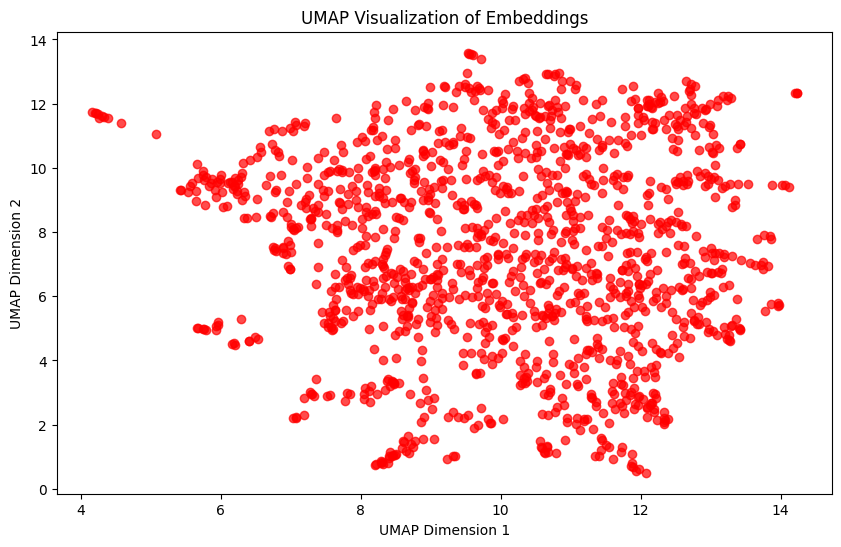

In [20]:
# Ï†ïÍ∑úÌôî
scaler = StandardScaler()
embedding_vectors = scaler.fit_transform(merged_df['embedding'].tolist())

import matplotlib.pyplot as plt
import umap

umap_reducer = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=42)
reduced_embeddings = umap_reducer.fit_transform(embedding_vectors)

# UMAP ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.7, c='red')

plt.title("UMAP Visualization of Embeddings")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()

## 3. Local Outlier Factor

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


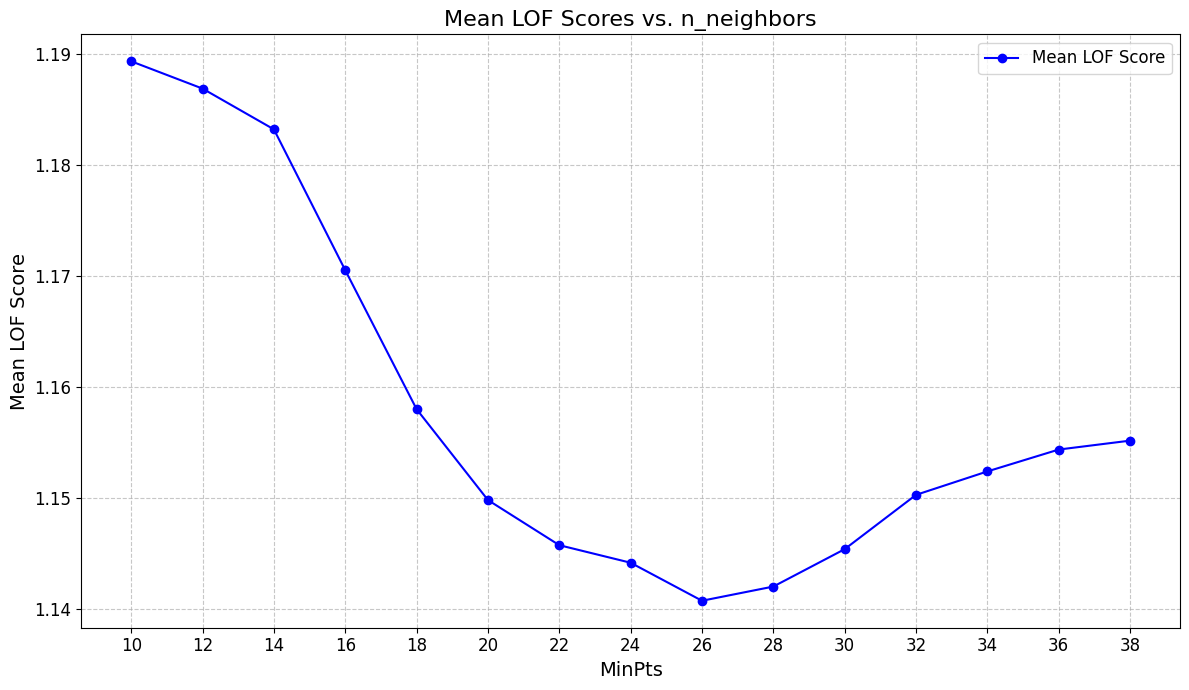

In [25]:
from sklearn.neighbors import LocalOutlierFactor

umap_reducer = umap.UMAP(n_components=10, random_state=42)
reduced_embeddings = umap_reducer.fit_transform(embedding_vectors)

# LOF Ïã§Ìóò Î≤îÏúÑ ÏÑ§Ï†ï (5Î∂ÄÌÑ∞ 30ÍπåÏßÄ 2Ïî© Ï¶ùÍ∞Ä)
n_neighbors_range = range(10, 40, 2)

# Í∞Å n_neighborsÏùò ÌèâÍ∑† LOF Ï†êÏàò Ï†ÄÏû•
lof_mean_scores = []

for n in n_neighbors_range:
    lof = LocalOutlierFactor(n_neighbors=n, metric='cosine', contamination=0.1)
    lof.fit_predict(reduced_embeddings)  # LOF Ï†êÏàò Í≥ÑÏÇ∞
    lof_scores = -lof.negative_outlier_factor_  # LOF Ï†êÏàò Ï∂îÏ∂ú
    mean_lof_score = lof_scores.mean()
    lof_mean_scores.append((n, mean_lof_score))

# Í≤∞Í≥º Ï†ïÎ¶¨
lof_mean_df = pd.DataFrame(lof_mean_scores, columns=['n_neighbors', 'mean_lof_score'])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 7))
plt.plot(lof_mean_df['n_neighbors'], lof_mean_df['mean_lof_score'], marker='o', linestyle='-', color='b', label='Mean LOF Score')
plt.title("Mean LOF Scores vs. n_neighbors", fontsize=16)
plt.xlabel("MinPts", fontsize=14)
plt.ylabel("Mean LOF Score", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(lof_mean_df['n_neighbors'], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [34]:
# LOF Ï†ÅÏö©
lof = LocalOutlierFactor(n_neighbors=14, metric='cosine', contamination=0.1)
lof.fit(reduced_embeddings)
merged_df['LOF_Score'] = -lof.negative_outlier_factor_  # LOF Ï†êÏàò
merged_df['is_outlier'] = lof.fit_predict(reduced_embeddings)  # -1: Ïù¥ÏÉÅÏπò, 1: Ï†ïÏÉÅÏπò

# LOF Ï†êÏàòÏóê Îî∞Îùº Ï†ïÎ†¨
sorted_df = merged_df.sort_values(by='LOF_Score', ascending=False)
sorted_df.to_csv('/content/drive/MyDrive/Colab Notebooks/inbound_service/local_outlier_factor_analysis/lof_analysis_result.csv', encoding='utf-8')

In [30]:
sorted_df.head(10)

search_result                                    attraction_info  \
996          Ï∂©Ï£º ÌôúÏò•ÎèôÍµ¥  1922ÎÖÑ ÏùºÏ†úÍ∞ïÏ†êÍ∏∞Ïóê Í∞úÎ∞úÎêú Íµ≠ÎÇ¥ Ïú†Ïùº ÌôúÏÑù Í¥ëÏÇ∞ÏúºÎ°ú Í∏∞Î°ùÏÉÅ 57km, ÎπÑÍ≥µÏãù 8...   
898        ÌÜµÏùºÏ†Ñ ÏùÄÌñâÎÇòÎ¨¥Í∏∏  ÌÜµÏùºÏ†Ñ ÏùÄÌñâÎÇòÎ¨¥Í∏∏ÏùÄ Í≤ΩÏ£ºÏãúÏùò ÎåÄÌëúÏ†ÅÏù∏ Í∞ÄÏùÑ Î™ÖÏÜåÎ°ú ÏÜêÍºΩÌûàÎäî Í≥≥Ïù¥ÎùºÍ≥† Ìï† Ïàò ÏûàÎã§. ...   
1002      ÎåÄÌïúÏÑ±Í≥µÌöå Í∞ïÌôîÏÑ±Îãπ  Í∞ïÌôîÏÑ±ÎãπÏùÄ Í≥†ÏöîÌïú (Charies Jone Corfe) Ï¥àÎåÄÏ£ºÍµêÍ∞Ä 1900ÎÖÑÏóê Ï∂ïÏÑ±...   
1142   ÎåÄÌïúÏÑ±Í≥µÌöå ÏÑúÏö∏Ï£ºÍµêÏ¢åÏÑ±Îãπ  ÎåÄÌïúÏÑ±Í≥µÌöå ÏÑúÏö∏Ï£ºÍµêÏ¢åÏÑ±ÎãπÏùÄ ÏπúÍµêÏùò Ïã†ÏïôÏúºÎ°ú ÏÑ†ÍµêÌïòÎäî Ï†úÏûêÍ≥µÎèôÏ≤¥Ïù¥Îã§. Ïù¥ Í±¥Î¨ºÏùÄ ÎåÄÌïú...   
1381  ÎÇòÎ∞îÏúÑ ÏÑ±Îãπ(ÌôîÏÇ∞Ï≤úÏ£ºÍµêÌöå)  ÎÇòÎ∞îÏúÑ ÏÑ±ÎãπÏùÄ Ï°∞ÏÑ† ÌóåÏ¢Ö 11ÎÖÑ(1845ÎÖÑ) ÍπÄÎåÄÍ±¥ Ïã†Î∂ÄÍ∞Ä Ï§ëÍµ≠ÏóêÏÑú ÏÇ¨Ï†úÏÑúÌíàÏùÑ Î∞õÍ≥†...   
881          ÏÑúÏö∏ ÏïΩÌòÑÏÑ±Îãπ  ÏïΩÌòÑ(Ëó•Â≥¥) ÏÑ±Îãπ(ËÅñÂ†Ç)ÏùÄ Í∏∏Ïù¥ ÏïΩ 32m, ÎÑàÎπÑÍ∞Ä 12mÎ°ú Ïù¥Î£®Ïñ¥ÏßÑ 396m¬≤(1...   
486            ÎèôÎ™ÖÎèôÏÑ±Îãπ  Í∞ïÏõêÎèÑ ÏÜçÏ¥àÏãú ÎèôÎ™ÖÎèôÏóê ÏûàÎäî Ï∂òÏ≤úÍµêÍµ¨ ÏÜåÏÜçÏùò Í∞ÄÌÜ®Î¶≠ Ï≤úÏ£ºÍµêÌöåÏù¥Îã§. ÏÜçÏ¥à ÌÑ∞ÎØ∏ÎÑê Ïù∏Í∑º...   
884          ÏÑúÏö∏ Ï†ïÎèôÍµêÌöå  Ï†ïÎèô ÍµêÌöåÎäî Í∞úÏã†ÍµêÍ∞Ä Ïù¥ ÎïÖÏóê Î≥¥Í∏âÎêú ÌõÑ Í∞ÄÏû• Î®ºÏ†Ä ÏÑ∏ÏõåÏßÑ ÍµêÌöåÏù¥Îã§. 1885ÎÖÑ ÎØ∏...   
795            Ïó≠ÏÇºÎèôÏÑ±Îãπ  Í∞ïÎÇ®ÏßÄÏó≠Ïùò ÍµêÏÑ∏ Ïã†Ïû•Ïóê Îî∞Îùº 1984ÎÖÑ 8Ïõî 1Ïùº ÎåÄÏπòÎèô ÏÑ±ÎãπÍ≥º ÏñëÏû¨Îèô ÏÑ±ÎãπÏùò Í¥ÄÌï†...   
545           Í¥ÄÎ∞©Ï†úÎ¶º\n  Í¥ÄÎ∞©Ï†úÎäî Í¥ÄÎ∞©Ï≤úÏóê ÏûàÎäî Ï†úÎ∞©ÏúºÎ°úÏÑú Îã¥ÏñëÏùç ÎÇ®ÏÇ∞Î¶¨ ÎèôÏ†ïÏûê ÎßàÏùÑÎ°úÎ∂ÄÌÑ∞ ÏàòÎ∂ÅÎ©¥ Ìô©Í∏àÎ¶¨Î•º ...   

                                           english_info  \
996   It is the only talc mine in Korea developed du...   
898   The Tongiljeon Ginkgo Tree Road is considered ...   
1002  Ganghwa Cathedral was built in 1900 by the fir...   
1142  The Anglican Church of Korea, Seoul Cathedral ...   
1381  Nabawi Cathedral was built in 1845 (the 11th y...   
881   Yakhyeon (Ëó•Â≥¥) Cathedral (ËÅñÂ†Ç) is a small cathed...   
486   It is a Catholic church belonging to the Chunc...   
884   Jeongdong Church was the first church establis...   
795   Due to the growth of the church in the Gangnam...   
545   Gwanbangje is an embankment on Gwanbangcheon S...   

                            name                        info  \
996                  Hwalok Cave                 Hwalok Cave   
898             Gingko Tree Road            Gingko Tree Road   
1002  Ganghwa Anglican Cathedral  Ganghwa Anglican Cathedral   
1142    Seoul Anglican Cathedral    Seoul Anglican Cathedral   
1381    Choryang Catholic Church    Choryang Catholic Church   
881     Yakhyeon Catholic Church    Yakhyeon Catholic Church   
486        Myeong-dong Cathedral       Myeong-dong Cathedral   
884             Chungdong Church            Chungdong Church   
795      Yeoksam Catholic Church     Yeoksam Catholic Church   
545         Gwanbangjerim Forest        Gwanbangjerim Forest   

                                                 corpus  \
996   it be the only talc mine in korea develop duri...   
898   the tongiljeon ginkgo tree road be consider on...   
1002  ganghwa cathedral be build in by the first bis...   
1142  the anglican church of korea seoul cathedral b...   
1381  nabawi cathedral be build in the th year of ki...   
881   yakhyeon cathedral be a small cathedral buildi...   
486   it be a catholic church belong to the chuncheo...   
884   jeongdong church be the first church establish...   
795   due to the growth of the church in the gangnam...   
545   gwanbangje be an embankment on gwanbangcheon s...   

                 attraction_name  review_cnt  \
996                          NaN           0   
898             Gingko Tree Road           4   
1002  Ganghwa Anglican Cathedral           3   
1142    Seoul Anglican Cathedral           7   
1381    Choryang Catholic Church           4   
881     Yakhyeon Catholic Church           3   
486        Myeong-dong Cathedral         447   
884             Chungdong Church           3   
795    

In [31]:
sorted_df.tail(10)

search_result                                    attraction_info  \
814     ÏÑúÏö∏Î∞±Ï†úÏñ¥Î¶∞Ïù¥Î∞ïÎ¨ºÍ¥Ä  ÏÑúÏö∏Î∞±Ï†úÏñ¥Î¶∞Ïù¥Î∞ïÎ¨ºÍ¥ÄÏùÄ Î™ΩÏ¥åÌÜ†ÏÑ±Ïù¥ Í≥†ÎåÄÍµ≠Í∞Ä Î∞±Ï†úÏùò ÏôïÏÑ±Ïù¥ÏóàÎã§Îäî ÏÇ¨Ïã§Í≥º ÏÑúÏö∏Ïùò 2Ï≤úÎÖÑ ...   
804    Íµ≠Î¶Ω Í≤ÄÎßàÏÇ∞ÏûêÏó∞Ìú¥ÏñëÎ¶º  Ïã†ÏõêÎ¶¨Ïóê ÏúÑÏπòÌïú Í≤ÄÎßàÏÇ∞ ÏûêÏó∞Ìú¥ÏñëÎ¶ºÏùÄ ÏÇ∞Î¶º ÏÜç ÎÇòÎ¨¥ÏóêÏÑú ÎøúÏñ¥ ÎÇ¥Îäî ÌîºÌÜ§ÏπòÎìú (Phyt...   
773         ÏõîÎìúÏò®Ï≤ú24  ÏõîÎìúÏò®Ï≤ú24Îäî Ï∂òÏ≤úÏãú Ïã†Î∂ÅÏùçÏóê ÏúÑÏπòÌïú Ïò®Ï≤úÏù¥Îã§. Ï¥ù 3Ï∏µ Í±¥Î¨ºÏóê ÎÇ¥Î∂ÄÎäî ÎÑìÍ≥† Îã§ÏñëÌïú...   
1145       Í≤ΩÏ£º Í∞êÏùÄÏÇ¨ÏßÄ  Í∞êÏùÄÏÇ¨Îäî ÎèôÌï¥ÏïàÏóê ÏûàÎäî ÌÜµÏùºÏã†ÎùºÏãúÎåÄÏùò ÏÇ¨Ï∞∞Î°ú Ïã†Îùº Î¨∏Î¨¥ÏôïÏù¥ ÏÇºÍµ≠ÏùÑ ÌÜµÏùºÌïú ÌõÑ Î∂ÄÏ≤òÏùò...   
647          Îß§ÎØ∏ÏÑ±\n  Îß§ÎØ∏ÏÑ±ÏùÄ 2003ÎÖÑ ÌÉúÌíç Îß§ÎØ∏Î°ú Í≤ΩÏûëÏßÄÎ•º ÏûÉÏùÄ ÏãúÎØº Î∞±ÏàúÏÇº Ïî®Í∞Ä ÏûêÏó∞Ïû¨Ìï¥Î°úÎ∂ÄÌÑ∞ ÏûëÎ¨º...   
979            ÌóàÏã¨Ï≤≠  ÌóàÏã¨Ï≤≠ÏùÄ Ìé∏ÏïàÌïòÍ≥† Ï¶êÍ±∞Ïö¥ Ïò®Ï≤úÏöïÍ≥º Ìú¥Ïãù Î∞è Ï≤¥Î†•Îã®Î†®ÏùÑ ÌÜµÌïú Í±¥Í∞ïÏ¶ùÏßÑÏùÑ Ï∂îÍµ¨ÌïòÎäî ÏÉàÎ°ú...   
115     ÎïÖÎÅùÌï¥ÏñëÏûêÏó∞ÏÇ¨Î∞ïÎ¨ºÍ¥Ä  ÏÑ∏Í≥ÑÏ†ÅÏù∏ Ìå®Î•òÏôÄ ÏÇ∞Ìò∏Î•ò, Ïñ¥Î•ò, Ìè¨Ïú†Î•ò, Í∞ëÍ∞ÅÎ•ò, ÌôîÏÑùÎ•ò, ÌååÏ∂©Î•ò, Ïú°ÏßÄ Í≥§Ï∂©Ïóê Ïù¥...   
113     Î∂ÄÏÇ∞Ìï¥ÏñëÏûêÏó∞ÏÇ¨Î∞ïÎ¨ºÍ¥Ä  Î∂ÄÏÇ∞ Ìï¥ÏñëÏûêÏó∞ÏÇ¨Î∞ïÎ¨ºÍ¥ÄÏùÄ Ìï¥ÏñëÏùò Ï§ëÏöîÏÑ±ÏùÑ Ïù∏ÏãùÌïòÍ≥†, ÏÇ¨ÎùºÏ†∏Í∞ÄÎäî ÏÜåÏ§ëÌïú Ìï¥ÏñëÏûêÏó∞ÏÇ¨ ÏûêÎ£å...   
1202       ÎåÄÍµ¨ Ïä§ÌååÎ∞∏Î¶¨  Ïä§ÌååÎ∞∏Î¶¨Îäî Îã¨ÏÑ±Íµ∞ ÎÉâÏ≤úÎ¶¨Ïóê ÏúÑÏπòÌïú Ïò®Ï≤úÏãúÏÑ§ Î∞è ÏÇ¨Ïö∞ÎÇò ÏãúÏÑ§Î°ú 2003ÎÖÑÏóê Ïò§ÌîàÌñàÎã§....   
1019       ÌïòÎÇòÍ∞úÌï¥ÏàòÏöïÏû•  ÌïòÎÇòÍ∞úÌï¥ÏàòÏöïÏû•ÏùÄ Î¨¥ÏùòÎèÑ ÏÑúÏ™ΩÏóê ÏûêÎ¶¨Ìïú Í∞ØÎ≤åÏùÑ ÌíàÏùÄ Ìï¥ÏàòÏöïÏû•Ïù¥Îã§. ÌïòÎÇòÍ∞úÎäî Í∞ÄÏû• ÌÅ∞ ...   

                                           english_info  \
814   The Seoul Baekje Children's Museum is the only...   
804   The Geommasan Natural Recreation Forest locate...   
773   World Hot Spring 24 is a hot spring located in...   
1145  Gamsansa Temple is a temple from the Unified S...   
647   Maemi Castle is a wall that Mr. Baek Soon-sam,...   
979   Heosimcheong is a new type of urban hot spring...   
115   It is a place with the best variety of shellfi...   
113   The Busan Marine Natural History Museum recogn...   
1202  Spa Valley is a hot spring and sauna facility ...   
1019  Hanagae Beach is a beach that embraces the tid...   

                                          name  \
814                        Seoul Baekje Museum   
804              Geommasan Recreational Forest   
773                              World Oncheon   
1145                      Gameunsa Temple Site   
647                                 Maemiseong   
979                           Hurshimchung Spa   
115   Ttangkkeut Marine Natural History Museum   
113        Busan Marine Natural History Museum   
1202                      Water Park Spavalley   
1019                             Hanagae Beach   

                                          info  \
814                        Seoul Baekje Museum   
804              Geommasan Recreational Forest   
773                              World Oncheon   
1145                      Gameunsa Temple Site   
647                                 Maemiseong   
979                           Hurshimchung Spa   
115   Ttangkkeut Marine Natural History Museum   
113        Busan Marine Natural History Museum   
1202                      Water Park Spavalley   
1019                             Hanagae Beach   

                                                 corpus  \
814   the seoul baekje child museum be the only chil...   
804   the geommasan natural recreation forest locate...   
773   world hot spring be a hot spring locate in sin...   
1145  gamsansa temple be a temple from the unified s...   
647   maemi castle be a wall that mr baek soon sam a...   
979   heosimcheong be a new type of urban hot spring...   
115   it be a place with the good variety of shellfi...   
113   the busan marine natural history museum recogn...   
1202  spa valley be a hot spring and sauna facility ...   
1019  hanagae beach be a beach that embrace t

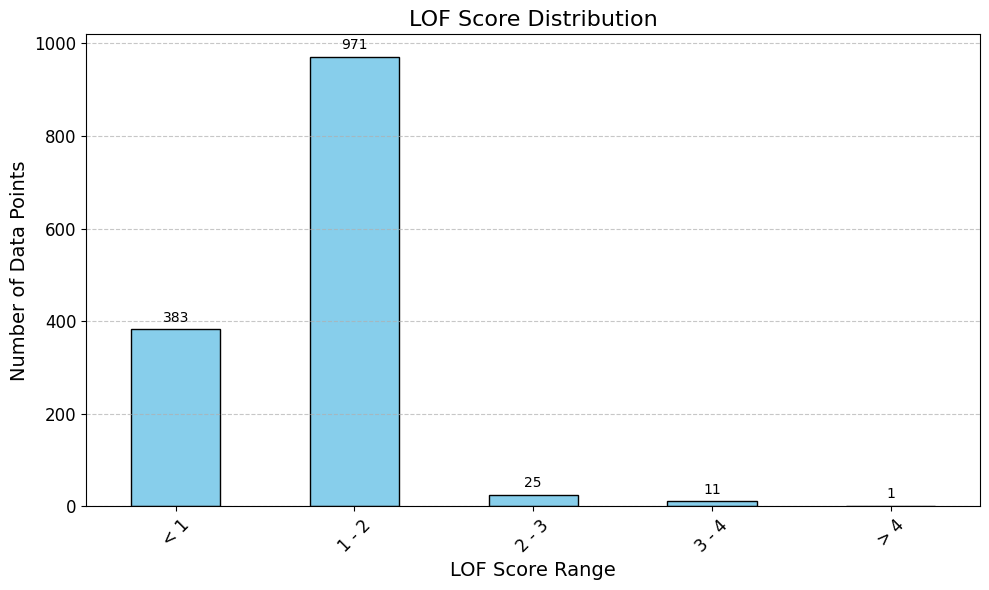

In [36]:
# ‚úÖ 1. LOF_Score Í∏∞Ï§Ä Íµ¨Í∞Ñ ÏÑ§Ï†ï
bins = [float('-inf'), 1, 2, 3, 4, float('inf')]
labels = ['< 1', '1 - 2', '2 - 3', '3 - 4', '> 4']

# ‚úÖ 2. LOF_Score Í∞íÏùÑ Íµ¨Í∞ÑÏóê Ìï†Îãπ
sorted_df['LOF_Score_Category'] = pd.cut(sorted_df['LOF_Score'], bins=bins, labels=labels)

# ‚úÖ 3. Í∞Å Íµ¨Í∞ÑÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò Í≥ÑÏÇ∞
category_counts = sorted_df['LOF_Score_Category'].value_counts().sort_index()

# ‚úÖ 4. ÏãúÍ∞ÅÌôî Î∞è Î∞î ÏúÑÏóê Í∞úÏàò ÌëúÏãú
plt.figure(figsize=(10, 6))
ax = category_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('LOF Score Distribution', fontsize=16)
plt.xlabel('LOF Score Range', fontsize=14)
plt.ylabel('Number of Data Points', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# ‚úÖ Í∞Å Î∞î ÏúÑÏóê Í∞úÏàò ÌëúÏãú Î∞è Î∞î ÏïÑÎûòÏóê Ïà´Ïûê ÌëúÏãú
for i, (category, value) in enumerate(category_counts.items()):
    # Î∞î ÏúÑÏóê Í∞úÏàò ÌëúÏãú
    ax.text(i, value + max(category_counts) * 0.01, f'{value}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

## Recomendation attraction

In [47]:
print(sorted_df.shape)
sorted_df.head()

(1391, 12)


search_result                                    attraction_info  \
996          Ï∂©Ï£º ÌôúÏò•ÎèôÍµ¥  1922ÎÖÑ ÏùºÏ†úÍ∞ïÏ†êÍ∏∞Ïóê Í∞úÎ∞úÎêú Íµ≠ÎÇ¥ Ïú†Ïùº ÌôúÏÑù Í¥ëÏÇ∞ÏúºÎ°ú Í∏∞Î°ùÏÉÅ 57km, ÎπÑÍ≥µÏãù 8...   
898        ÌÜµÏùºÏ†Ñ ÏùÄÌñâÎÇòÎ¨¥Í∏∏  ÌÜµÏùºÏ†Ñ ÏùÄÌñâÎÇòÎ¨¥Í∏∏ÏùÄ Í≤ΩÏ£ºÏãúÏùò ÎåÄÌëúÏ†ÅÏù∏ Í∞ÄÏùÑ Î™ÖÏÜåÎ°ú ÏÜêÍºΩÌûàÎäî Í≥≥Ïù¥ÎùºÍ≥† Ìï† Ïàò ÏûàÎã§. ...   
1002      ÎåÄÌïúÏÑ±Í≥µÌöå Í∞ïÌôîÏÑ±Îãπ  Í∞ïÌôîÏÑ±ÎãπÏùÄ Í≥†ÏöîÌïú (Charies Jone Corfe) Ï¥àÎåÄÏ£ºÍµêÍ∞Ä 1900ÎÖÑÏóê Ï∂ïÏÑ±...   
1142   ÎåÄÌïúÏÑ±Í≥µÌöå ÏÑúÏö∏Ï£ºÍµêÏ¢åÏÑ±Îãπ  ÎåÄÌïúÏÑ±Í≥µÌöå ÏÑúÏö∏Ï£ºÍµêÏ¢åÏÑ±ÎãπÏùÄ ÏπúÍµêÏùò Ïã†ÏïôÏúºÎ°ú ÏÑ†ÍµêÌïòÎäî Ï†úÏûêÍ≥µÎèôÏ≤¥Ïù¥Îã§. Ïù¥ Í±¥Î¨ºÏùÄ ÎåÄÌïú...   
1381  ÎÇòÎ∞îÏúÑ ÏÑ±Îãπ(ÌôîÏÇ∞Ï≤úÏ£ºÍµêÌöå)  ÎÇòÎ∞îÏúÑ ÏÑ±ÎãπÏùÄ Ï°∞ÏÑ† ÌóåÏ¢Ö 11ÎÖÑ(1845ÎÖÑ) ÍπÄÎåÄÍ±¥ Ïã†Î∂ÄÍ∞Ä Ï§ëÍµ≠ÏóêÏÑú ÏÇ¨Ï†úÏÑúÌíàÏùÑ Î∞õÍ≥†...   
881          ÏÑúÏö∏ ÏïΩÌòÑÏÑ±Îãπ  ÏïΩÌòÑ(Ëó•Â≥¥) ÏÑ±Îãπ(ËÅñÂ†Ç)ÏùÄ Í∏∏Ïù¥ ÏïΩ 32m, ÎÑàÎπÑÍ∞Ä 12mÎ°ú Ïù¥Î£®Ïñ¥ÏßÑ 396m¬≤(1...   
486            ÎèôÎ™ÖÎèôÏÑ±Îãπ  Í∞ïÏõêÎèÑ ÏÜçÏ¥àÏãú ÎèôÎ™ÖÎèôÏóê ÏûàÎäî Ï∂òÏ≤úÍµêÍµ¨ ÏÜåÏÜçÏùò Í∞ÄÌÜ®Î¶≠ Ï≤úÏ£ºÍµêÌöåÏù¥Îã§. ÏÜçÏ¥à ÌÑ∞ÎØ∏ÎÑê Ïù∏Í∑º...   
884          ÏÑúÏö∏ Ï†ïÎèôÍµêÌöå  Ï†ïÎèô ÍµêÌöåÎäî Í∞úÏã†ÍµêÍ∞Ä Ïù¥ ÎïÖÏóê Î≥¥Í∏âÎêú ÌõÑ Í∞ÄÏû• Î®ºÏ†Ä ÏÑ∏ÏõåÏßÑ ÍµêÌöåÏù¥Îã§. 1885ÎÖÑ ÎØ∏...   
795            Ïó≠ÏÇºÎèôÏÑ±Îãπ  Í∞ïÎÇ®ÏßÄÏó≠Ïùò ÍµêÏÑ∏ Ïã†Ïû•Ïóê Îî∞Îùº 1984ÎÖÑ 8Ïõî 1Ïùº ÎåÄÏπòÎèô ÏÑ±ÎãπÍ≥º ÏñëÏû¨Îèô ÏÑ±ÎãπÏùò Í¥ÄÌï†...   
545           Í¥ÄÎ∞©Ï†úÎ¶º\n  Í¥ÄÎ∞©Ï†úÎäî Í¥ÄÎ∞©Ï≤úÏóê ÏûàÎäî Ï†úÎ∞©ÏúºÎ°úÏÑú Îã¥ÏñëÏùç ÎÇ®ÏÇ∞Î¶¨ ÎèôÏ†ïÏûê ÎßàÏùÑÎ°úÎ∂ÄÌÑ∞ ÏàòÎ∂ÅÎ©¥ Ìô©Í∏àÎ¶¨Î•º ...   

                                           english_info  \
996   It is the only talc mine in Korea developed du...   
898   The Tongiljeon Ginkgo Tree Road is considered ...   
1002  Ganghwa Cathedral was built in 1900 by the fir...   
1142  The Anglican Church of Korea, Seoul Cathedral ...   
1381  Nabawi Cathedral was built in 1845 (the 11th y...   
881   Yakhyeon (Ëó•Â≥¥) Cathedral (ËÅñÂ†Ç) is a small cathed...   
486   It is a Catholic church belonging to the Chunc...   
884   Jeongdong Church was the first church establis...   
795   Due to the growth of the church in the Gangnam...   
545   Gwanbangje is an embankment on Gwanbangcheon S...   

                            name                        info  \
996                  Hwalok Cave                 Hwalok Cave   
898             Gingko Tree Road            Gingko Tree Road   
1002  Ganghwa Anglican Cathedral  Ganghwa Anglican Cathedral   
1142    Seoul Anglican Cathedral    Seoul Anglican Cathedral   
1381    Choryang Catholic Church    Choryang Catholic Church   
881     Yakhyeon Catholic Church    Yakhyeon Catholic Church   
486        Myeong-dong Cathedral       Myeong-dong Cathedral   
884             Chungdong Church            Chungdong Church   
795      Yeoksam Catholic Church     Yeoksam Catholic Church   
545         Gwanbangjerim Forest        Gwanbangjerim Forest   

                                                 corpus  \
996   it be the only talc mine in korea develop duri...   
898   the tongiljeon ginkgo tree road be consider on...   
1002  ganghwa cathedral be build in by the first bis...   
1142  the anglican church of korea seoul cathedral b...   
1381  nabawi cathedral be build in the th year of ki...   
881   yakhyeon cathedral be a small cathedral buildi...   
486   it be a catholic church belong to the chuncheo...   
884   jeongdong church be the first church establish...   
795   due to the growth of the church in the gangnam...   
545   gwanbangje be an embankment on gwanbangcheon s...   

                 attraction_name  review_cnt  \
996                          NaN           0   
898             Gingko Tree Road           4   
1002  Ganghwa Anglican Cathedral           3   
1142    Seoul Anglican Cathedral           7   
1381    Choryang Catholic Church           4   
881     Yakhyeon Catholic Church           3   
486        Myeong-dong Cathedral         447   
884             Chungdong Church           3   
795    

In [39]:
print(review_df.shape)
review_df.head()

(273622, 9)


attraction_name         name  contributions                  location  \
0  Gyeongbokgung Palace        Tom F             37                             
1  Gyeongbokgung Palace  eriquef2017             29  Puerto Escondido, Mexico   
2  Gyeongbokgung Palace      colin h             73       Ely, United Kingdom   
3  Gyeongbokgung Palace       Natari             33        Almaty, Kazakhstan   
4  Gyeongbokgung Palace          Luc            442       Brisbane, Australia   

   score                             tag                date  \
0      5                     nice palace  Nov 2024 ‚Ä¢ Couples   
1      5        History surrounding you!  Oct 2024 ‚Ä¢ Couples   
2      5    Must see palace if in Seoul.     Nov 2024 ‚Ä¢ Solo   
3      5  Experience the spirit of Korea     Sep 2024 ‚Ä¢ Solo   
4      5             Must visit in Seoul  Oct 2024 ‚Ä¢ Friends   

                                             content  \
0  There are several palaces in downtown Seoul, a...   
1  Exceptionally preserved and restored history o...   
2  The largest of the palaces in Seoul and it doe...   
3  Undoubtedly, it‚Äôs a must see place, especially...   
4  This is a huge palace and stunning to explore....   

                                          profileUrl  
0    https://www.tripadvisor.com/Profile/W6358IDtomf  
1    https://www.tripadvisor.com/Profile/eriquef2017  
2  https://www.tripadvisor.com/Profile/colinhaley812  
3  https://www.tripadvisor.com/Profile/W7498XRnat...  
4        https://www.tripadvisor.com/Profile/luci321

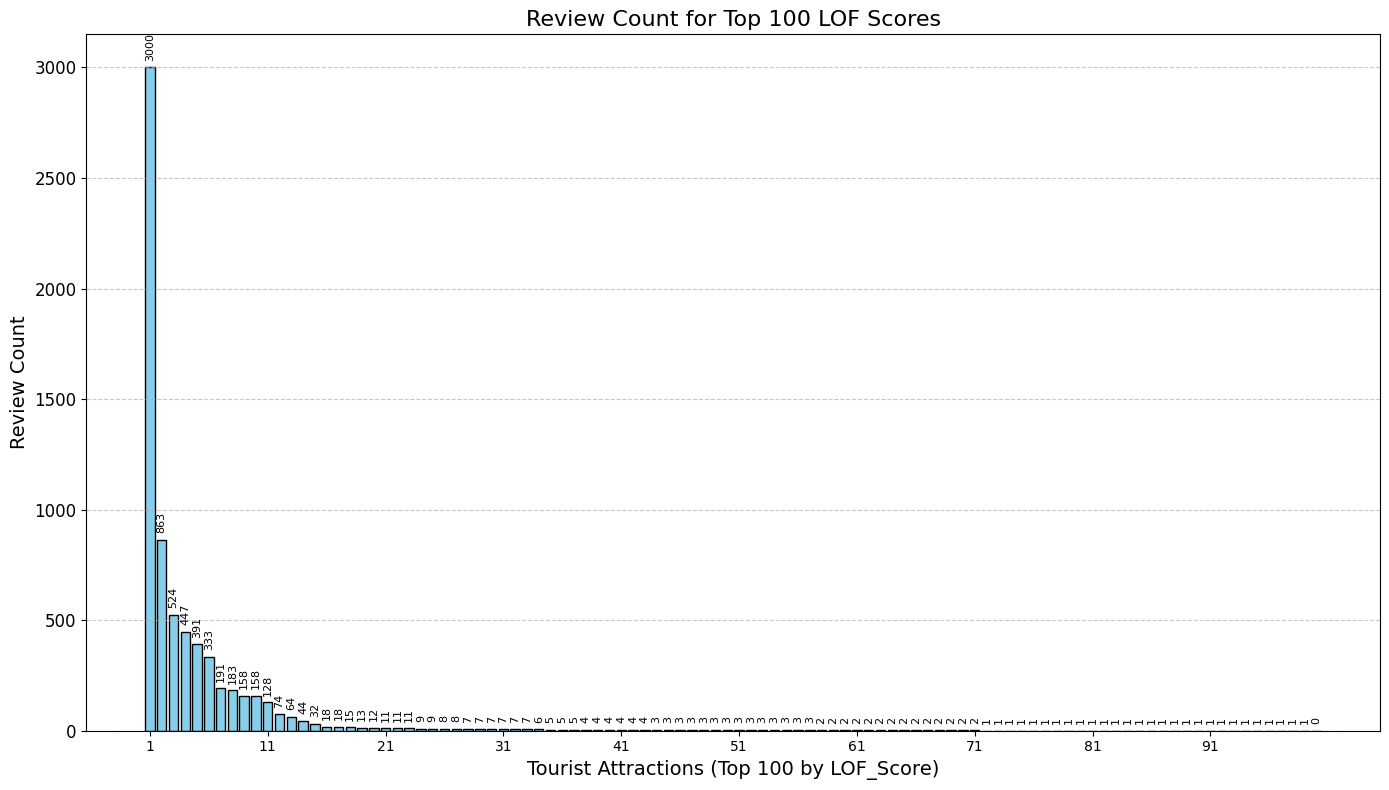

In [43]:
# ‚úÖ LOF_Score ÏÉÅÏúÑ 100Í∞ú ÏÑ†ÌÉù
top_100_lof = sorted_df.sort_values(by='LOF_Score', ascending=False).head(100)

# ‚úÖ LOF_Score ÏÉÅÏúÑ 100Í∞ú ÏÑ†ÌÉù Î∞è review_cnt Í∏∞Ï§Ä Ï†ïÎ†¨
top_100_lof_sorted = top_100_lof.sort_values(by='review_cnt', ascending=False).reset_index(drop=True)

# ‚úÖ ÏãúÍ∞ÅÌôî (xÏ∂ï: Í¥ÄÍ¥ëÏßÄ Ïù∏Îç±Ïä§, yÏ∂ï: review_cnt)
plt.figure(figsize=(14, 8))
plt.bar(top_100_lof_sorted.index, top_100_lof_sorted['review_cnt'], color='skyblue', edgecolor='black')

plt.title("Review Count for Top 100 LOF Scores", fontsize=16)
plt.xlabel("Tourist Attractions (Top 100 by LOF_Score)", fontsize=14)
plt.ylabel("Review Count", fontsize=14)
plt.xticks(ticks=range(0, 100, 10), labels=[f'{i+1}' for i in range(0, 100, 10)], fontsize=10)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# ‚úÖ Í∞Å Î∞î ÏúÑÏóê Í∞úÏàò ÌëúÏãú (ÏûëÏùÄ Í∏ÄÏî®Î°ú)
for i, value in enumerate(top_100_lof_sorted['review_cnt']):
    plt.text(i, value + max(top_100_lof_sorted['review_cnt']) * 0.01, str(value), ha='center', va='bottom', fontsize=8, rotation=90)

plt.tight_layout()
plt.show()

In [44]:
# ‚úÖ 1. review_cntÍ∞Ä 100Í∞ú ÎÑòÎäî Îç∞Ïù¥ÌÑ∞ Ï†úÏô∏
filtered_df = sorted_df[sorted_df['review_cnt'] <= 100]

# ‚úÖ 2. LOF_Score Í∏∞Ï§Ä ÏÉÅÏúÑ 100Í∞ú ÌïÑÌÑ∞ÎßÅ
top_100_lof_filtered = filtered_df.sort_values(by='LOF_Score', ascending=False).head(100)
top_100_lof_filtered.head()

search_result                                    attraction_info  \
996          Ï∂©Ï£º ÌôúÏò•ÎèôÍµ¥  1922ÎÖÑ ÏùºÏ†úÍ∞ïÏ†êÍ∏∞Ïóê Í∞úÎ∞úÎêú Íµ≠ÎÇ¥ Ïú†Ïùº ÌôúÏÑù Í¥ëÏÇ∞ÏúºÎ°ú Í∏∞Î°ùÏÉÅ 57km, ÎπÑÍ≥µÏãù 8...   
898        ÌÜµÏùºÏ†Ñ ÏùÄÌñâÎÇòÎ¨¥Í∏∏  ÌÜµÏùºÏ†Ñ ÏùÄÌñâÎÇòÎ¨¥Í∏∏ÏùÄ Í≤ΩÏ£ºÏãúÏùò ÎåÄÌëúÏ†ÅÏù∏ Í∞ÄÏùÑ Î™ÖÏÜåÎ°ú ÏÜêÍºΩÌûàÎäî Í≥≥Ïù¥ÎùºÍ≥† Ìï† Ïàò ÏûàÎã§. ...   
1002      ÎåÄÌïúÏÑ±Í≥µÌöå Í∞ïÌôîÏÑ±Îãπ  Í∞ïÌôîÏÑ±ÎãπÏùÄ Í≥†ÏöîÌïú (Charies Jone Corfe) Ï¥àÎåÄÏ£ºÍµêÍ∞Ä 1900ÎÖÑÏóê Ï∂ïÏÑ±...   
1142   ÎåÄÌïúÏÑ±Í≥µÌöå ÏÑúÏö∏Ï£ºÍµêÏ¢åÏÑ±Îãπ  ÎåÄÌïúÏÑ±Í≥µÌöå ÏÑúÏö∏Ï£ºÍµêÏ¢åÏÑ±ÎãπÏùÄ ÏπúÍµêÏùò Ïã†ÏïôÏúºÎ°ú ÏÑ†ÍµêÌïòÎäî Ï†úÏûêÍ≥µÎèôÏ≤¥Ïù¥Îã§. Ïù¥ Í±¥Î¨ºÏùÄ ÎåÄÌïú...   
1381  ÎÇòÎ∞îÏúÑ ÏÑ±Îãπ(ÌôîÏÇ∞Ï≤úÏ£ºÍµêÌöå)  ÎÇòÎ∞îÏúÑ ÏÑ±ÎãπÏùÄ Ï°∞ÏÑ† ÌóåÏ¢Ö 11ÎÖÑ(1845ÎÖÑ) ÍπÄÎåÄÍ±¥ Ïã†Î∂ÄÍ∞Ä Ï§ëÍµ≠ÏóêÏÑú ÏÇ¨Ï†úÏÑúÌíàÏùÑ Î∞õÍ≥†...   

                                           english_info  \
996   It is the only talc mine in Korea developed du...   
898   The Tongiljeon Ginkgo Tree Road is considered ...   
1002  Ganghwa Cathedral was built in 1900 by the fir...   
1142  The Anglican Church of Korea, Seoul Cathedral ...   
1381  Nabawi Cathedral was built in 1845 (the 11th y...   

                            name                        info  \
996                  Hwalok Cave                 Hwalok Cave   
898             Gingko Tree Road            Gingko Tree Road   
1002  Ganghwa Anglican Cathedral  Ganghwa Anglican Cathedral   
1142    Seoul Anglican Cathedral    Seoul Anglican Cathedral   
1381    Choryang Catholic Church    Choryang Catholic Church   

                                                 corpus  \
996   it be the only talc mine in korea develop duri...   
898   the tongiljeon ginkgo tree road be consider on...   
1002  ganghwa cathedral be build in by the first bis...   
1142  the anglican church of korea seoul cathedral b...   
1381  nabawi cathedral be build in the th year of ki...   

                 attraction_name  review_cnt  \
996                          NaN           0   
898             Gingko Tree Road           4   
1002  Ganghwa Anglican Cathedral           3   
1142    Seoul Anglican Cathedral           7   
1381    Choryang Catholic Church           4   

                                              embedding  LOF_Score  \
996   [-0.08450809866189957, 0.05948633700609207, 0....   4.013665   
898   [0.0104845454916358, 0.09078939259052277, 0.02...   3.485174   
1002  [0.047638799995183945, 0.046310052275657654, 0...   3.217466   
1142  [0.040632497519254684, 0.036646075546741486, 0...   3.199203   
1381  [-0.005303469020873308, 0.0771574005484581, 0....   3.189261   

      is_outlier LOF_Score_Category  
996           -1                > 4  
898           -1              3 - 4  
1002          -1              3 - 4  
1142          -1              3 - 4  
1381          -1              3 - 4

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


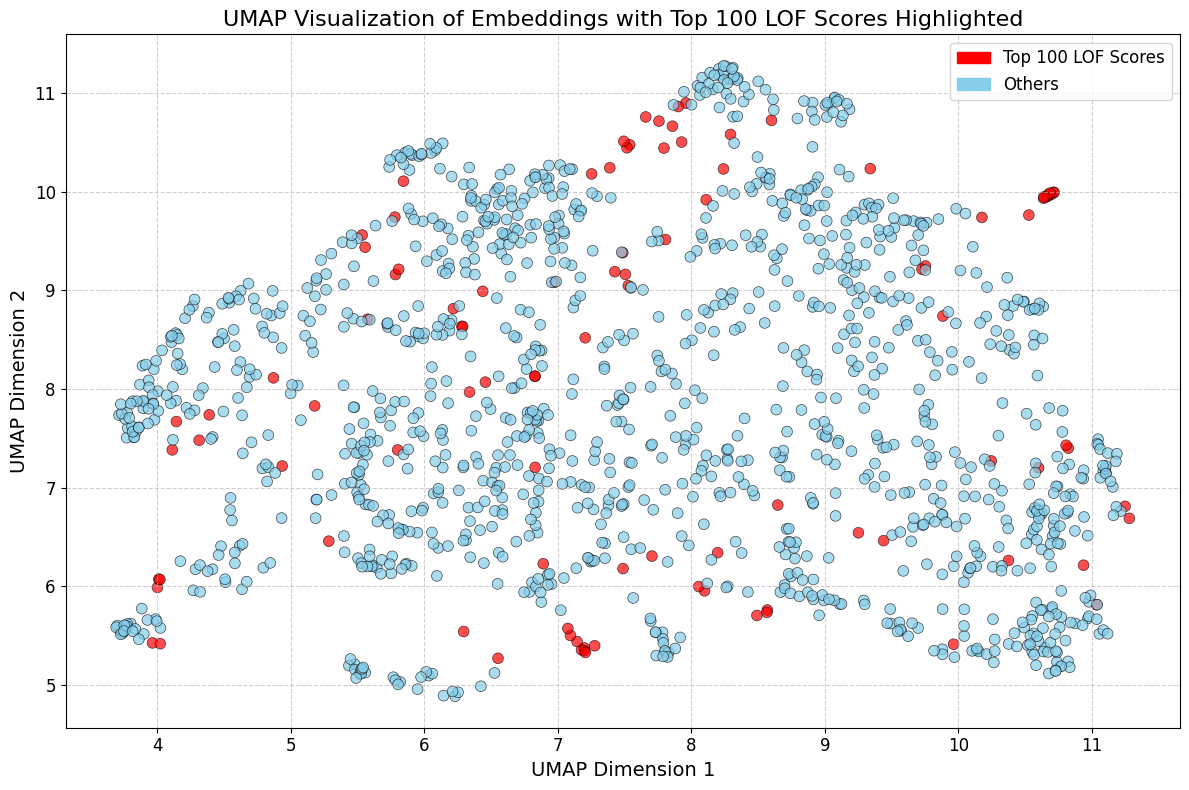

In [46]:
import numpy as np

# ‚úÖ UMAP Í∞ùÏ≤¥ ÏÑ†Ïñ∏ Î∞è ÏûÑÎ≤†Îî© Î≤°ÌÑ∞ Ï∂îÏ∂ú
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding_vectors = np.vstack(sorted_df['embedding'].values)

# ‚úÖ UMAP Ï†ÅÏö©ÌïòÏó¨ 2Ï∞®ÏõêÏúºÎ°ú Ï∂ïÏÜå
umap_embeddings = umap_reducer.fit_transform(embedding_vectors)

# ‚úÖ LOF_Score Í∏∞Ï§Ä ÏÉÅÏúÑ 100Í∞ú Ïù∏Îç±Ïä§ Ï∂îÏ∂ú
top_100_indices = sorted_df.sort_values(by='LOF_Score', ascending=False).head(100).index

# ‚úÖ ÏÉâÏÉÅ ÏÑ§Ï†ï (ÏÉÅÏúÑ 100Í∞úÏôÄ ÎÇòÎ®∏ÏßÄ Íµ¨Î∂Ñ)
colors = ['red' if idx in top_100_indices else 'skyblue' for idx in sorted_df.index]

# ‚úÖ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=colors, alpha=0.7, edgecolor='k', linewidth=0.5, s=60)

# ‚úÖ Î≤îÎ°Ä Ï∂îÍ∞Ä
import matplotlib.patches as mpatches
top_patch = mpatches.Patch(color='red', label='Top 100 LOF Scores')
rest_patch = mpatches.Patch(color='skyblue', label='Others')
plt.legend(handles=[top_patch, rest_patch], fontsize=12)

plt.title("UMAP Visualization of Embeddings with Top 100 LOF Scores Highlighted", fontsize=16)
plt.xlabel("UMAP Dimension 1", fontsize=14)
plt.ylabel("UMAP Dimension 2", fontsize=14)
plt.grid(linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()